## Choosing and comparing a Model - Machine Learning 

## Name: Sai Aditya Garlapati


In [1]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier

C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
from sklearn.naive_bayes import GaussianNB

In [3]:
credit = pd.read_csv("https://raw.githubusercontent.com/skathirmani/datasets/master/credit-default.csv")

#### Predicting Credit - default column from the above data set. using multiple algorithms and selecting a model out of it

In [4]:
credit.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_length       0
installment_rate        0
personal_status         0
other_debtors           0
residence_history       0
property                0
age                     0
installment_plan        0
housing                 0
existing_credits        0
default                 0
dependents              0
telephone               0
foreign_worker          0
job                     0
dtype: int64

In [5]:
credit.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [6]:
credit.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


Defining prediction variable as out and other supporting variables as x

In [7]:
out =credit['default']
x=credit.drop('default',axis=1)

selecting non categorical columns and eliminating them from creating dummy variables, not to create a lot of useless columns

In [8]:
non_dummy_cols = ['age','amount','months_loan_duration'] 

dummy_cols = list(set(x.columns) - set(non_dummy_cols))
x = pd.get_dummies(x, columns=dummy_cols)

In [9]:
len(x.columns)

71

In [10]:
xtrain, xval, ytrain,yval=train_test_split(x, out, test_size=0.30, random_state=100)

## KNN Classifier

In [11]:
model = KNeighborsClassifier()
model.fit(xtrain,ytrain)
validate_predict_knn = model.predict(xval)
print(accuracy_score(yval,validate_predict_knn))
print(classification_report(yval,validate_predict_knn))
pred_probs_knn = pd.DataFrame(model.predict_proba(xval), columns = ['Default', 'Not_Default'])

0.6766666666666666
             precision    recall  f1-score   support

          1       0.75      0.84      0.79       219
          2       0.35      0.23      0.28        81

avg / total       0.64      0.68      0.65       300



### Specificity = 0.84
### sensitivity = 0.23 

## Decision Tree Classifier

In [12]:
model = DecisionTreeClassifier(random_state=100)
model.fit(xtrain,ytrain)
validate_predict_dt = model.predict(xval)
print(accuracy_score(yval,validate_predict_dt))
print(classification_report(yval,validate_predict_dt))
pred_probs_dt = pd.DataFrame(model.predict_proba(xval), columns = ['Default', 'Not_Default'])

0.68
             precision    recall  f1-score   support

          1       0.81      0.74      0.77       219
          2       0.42      0.52      0.47        81

avg / total       0.70      0.68      0.69       300



### Specificity = 0.74
### sensitivity = 0.52 

## Decision Tree using Grid Search and Hyper Parameter Tuning

In [13]:
from sklearn.tree import export_graphviz
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import  cross_val_score

tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
clf.fit(xtrain,ytrain)
validate_predict = clf.predict(xval)
print(accuracy_score(yval,validate_predict))
print(classification_report(yval,validate_predict))

C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


0.7
             precision    recall  f1-score   support

          1       0.78      0.81      0.80       219
          2       0.44      0.40      0.42        81

avg / total       0.69      0.70      0.69       300



## Random Forest Classifier

In [14]:
model = RandomForestClassifier(random_state=100,n_estimators=300)
model.fit(xtrain,ytrain)
validate_predict_rf = model.predict(xval)
print(accuracy_score(yval,validate_predict_rf))
print(classification_report(yval,validate_predict_rf))
pred_probs_rf = pd.DataFrame(model.predict_proba(xval), columns = ['Default', 'Not_Default'])

0.7533333333333333
             precision    recall  f1-score   support

          1       0.79      0.89      0.84       219
          2       0.57      0.37      0.45        81

avg / total       0.73      0.75      0.73       300



### Specificity = 0.89
### sensitivity = 0.37 

## Ada Boost Classifier

In [15]:
model = AdaBoostClassifier(random_state=100,n_estimators=50)
model.fit(xtrain,ytrain)
validate_predict_ada = model.predict(xval)
print(accuracy_score(yval,validate_predict_ada))
print(classification_report(yval,validate_predict_ada))
pred_probs_ada = pd.DataFrame(model.predict_proba(xval), columns = ['Default', 'Not_Default'])

0.7166666666666667
             precision    recall  f1-score   support

          1       0.80      0.82      0.81       219
          2       0.47      0.43      0.45        81

avg / total       0.71      0.72      0.71       300



### Specificity = 0.82
### sensitivity = 0.43 

## Naive Bayes Classifier

In [16]:
model = GaussianNB()
model.fit(xtrain,ytrain)
validate_predict_nb = model.predict(xval)
print(accuracy_score(yval,validate_predict_nb))
print(classification_report(yval,validate_predict_nb))
pred_probs_nb = pd.DataFrame(model.predict_proba(xval), columns = ['Default', 'Not_Default'])

0.7033333333333334
             precision    recall  f1-score   support

          1       0.83      0.75      0.79       219
          2       0.46      0.58      0.51        81

avg / total       0.73      0.70      0.71       300



### Specificity = 0.75
### sensitivity = 0.58 

In [17]:
from sklearn.metrics import roc_curve

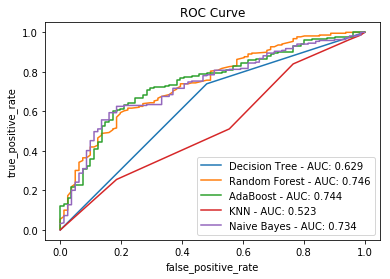

In [18]:
%matplotlib inline

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

false_positive_rate_dt, true_positive_rate_dt, thresholds_dt = roc_curve(yval, pred_probs_dt['Default'], pos_label = 1)
false_positive_rate_rf, true_positive_rate_rf, thresholds_rf = roc_curve(yval, pred_probs_rf['Default'], pos_label = 1)
false_positive_rate_ada, true_positive_rate_ada, thresholds_ada = roc_curve(yval, pred_probs_ada['Default'], pos_label = 1)
false_positive_rate_knn, true_positive_rate_knn, thresholds_knn = roc_curve(yval, pred_probs_knn['Default'], pos_label = 1)
false_positive_rate_nb, true_positive_rate_nb, thresholds_nb = roc_curve(yval, pred_probs_nb['Default'], pos_label = 1)


auc_dt = auc(false_positive_rate_dt, true_positive_rate_dt)
auc_rf = auc(false_positive_rate_rf, true_positive_rate_rf)
auc_ada = auc(false_positive_rate_ada, true_positive_rate_ada)
auc_knn = auc(false_positive_rate_knn, true_positive_rate_knn)
auc_nb = auc(false_positive_rate_nb, true_positive_rate_nb)


plt.plot(false_positive_rate_dt, true_positive_rate_dt)
plt.plot(false_positive_rate_rf, true_positive_rate_rf)
plt.plot(false_positive_rate_ada, true_positive_rate_ada)
plt.plot(false_positive_rate_knn, true_positive_rate_knn)
plt.plot(false_positive_rate_nb, true_positive_rate_nb)
plt.xlabel('false_positive_rate')
plt.ylabel('true_positive_rate')
plt.title('ROC Curve')
plt.legend(['Decision Tree - AUC: %.3f' % auc_dt,
            'Random Forest - AUC: %.3f' % auc_rf ,
            'AdaBoost - AUC: %.3f' % auc_ada,
            'KNN - AUC: %.3f' % auc_knn,
            'Naive Bayes - AUC: %.3f' % auc_nb])
plt.show()


## conclusion:

## The model that I would be choosing would be Random Forest Classifier becuase it has an accuracy of 75% and AUC curve is also high 0.746 .

